In [0]:
import pandas as pd

In [2]:
df_music = pd.read_csv("https://raw.githubusercontent.com/reillynski/data301-finalproject/master/df_music.csv", index_col=0)
df_music.head()

,name,type,promoter.name,info,pleaseNote,priceMin,priceMax,subGenre,city,state,venueName,attractionName,artists,num.artists,latitude,longitude,venueUpcoming,meanPrice,date
0,"Lit In Ac 2020 With Lil Kim, Fat Joe, Ja Rule,...",event,PROMOTED BY VENUE,NaN,NaN,52.0,92.0,French Rap,Atlantic City,New Jersey,Boardwalk Hall,Lil Kim,"['Lil Kim', 'Fat Joe', 'Ja Rule', 'State Prope...",10,39.354905,-74.438391,15,72.0,2020-04-04
2,"Yo Gotti, Da Baby, Kevin Gates, Kash Doll & more",event,PROMOTED BY VENUE,NaN,"Originally scheduled to take place Sunday, Mar...",54.0,154.0,French Rap,Detroit,Michigan,Little Caesars Arena,Yo Gotti,"['Yo Gotti', 'Kash Doll', 'DaBaby', 'Kevin Gat...",7,42.341089,-83.055434,26,104.0,2020-05-20
3,Spring MegaFest,event,PROMOTED BY VENUE,NaN,NaN,53.0,179.0,French Rap,Indianapolis,Indiana,Bankers Life Fieldhouse,Lil Baby,"['Lil Baby', '2 Chainz', 'Rod Wave', 'Jacquees...",5,39.764064,-86.155507,8,116.0,2020-04-10
4,No Limit Reunion Tour,event,PROMOTED BY VENUE,NaN,Artists subject to change. All sales are final...,55.0,195.0,French Rap,Atlanta,Georgia,State Farm Arena,Master P,"['Master P', 'Mia X', 'Silkk the Shocker', 'My...",5,33.757796,-84.394569,21,125.0,2020-05-01
5,Feed The Streetz Tour 2020,event,PROMOTED BY VENUE,NaN,Lineup subject to change.,75.0,175.0,French Rap,Brooklyn,New York,Barclays Center,Rick Ross,"['Rick Ross', 'Jeezy', '2 Chainz', 'Yo Gotti',...",9,40.683504,-73.976617,21,125.0,2020-05-15


Our data consists of event data from the Ticketmaster API about Hip-Hop/Rap events in the upcoming months. The dataset has 186 observations, each one corresponding to a different event, and 19 columns of descriptive variables about each event

In [3]:
from altair import *

df_music['date'] = pd.to_datetime(df_music['date'])

df_music["month"] = df_music["date"].dt.month

##not sure what graph is best here
Chart(df_music).mark_line().encode(
    x="month",
    y="count()"
)

alt.Chart(...)

In this dataset, the events are in the months of March-October with the most events falling in the month of May. If we redid this analysis we would expect that the above graph would be shifted to the right due to many events being pushed back weeks or even months due to the COVID-19 outbreak.

In [4]:
Chart(df_music).mark_errorbar().encode(
    x="state",
    y="min(priceMin)",
    y2="max(priceMax)"
) + Chart(df_music).mark_circle().encode(
    x="state",
    y="mean(meanPrice)"
)

alt.LayerChart(...)

This graph shows the minimum, maximum, and average prices of tickets in each of the states that have events in our dataset. It appears that the majority of states have a minimum price of around \$30 and an average price between \$50 and \$150. The maximum price of the states varies greatly with some having a maximum price of around \$50 and others with prices over \$600 

In [5]:
Chart(df_music).mark_bar().encode(
    X("subGenre"),
    y='count()',
)

alt.Chart(...)

The majority of the events in our dataset have a sub-genre of French Rap with around 170 events having this classification. The next closest category is urban with around 10 events 

In [6]:
df_music["numArtists"] = df_music["num.artists"]

Chart(df_music).mark_bar().encode(
    x="numArtists",
    y="count()"
)

alt.Chart(...)

Around 60 of the events in our dataset only have 1 artist performing and the second most is 3 artists. The events that have between 2 and 5 artists could be that there is a single main performer and several opening artists, however the events that have more than 5 are most likely larger events such as festivals.

In [7]:
!pip uninstall -y shapely
!apt-get -qq install python-cartopy python3-cartopy

Uninstalling Shapely-1.7.0:
  Successfully uninstalled Shapely-1.7.0
Selecting previously unselected package python-pkg-resources.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously uns

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


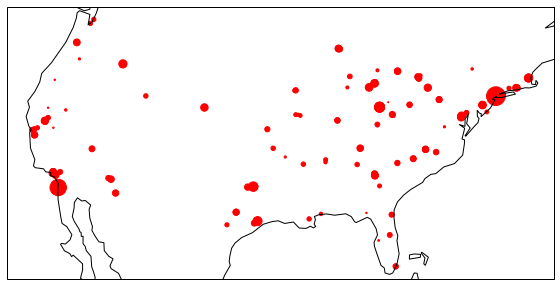

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

ax.scatter(x=df_music["longitude"], y=df_music["latitude"],
            c="red", s=df_music["venueUpcoming"],
            transform=ccrs.Geodetic())

This graph shows the spread of event locations across the US. The size of each circle is representative of the number of upcoming events at each venue, not necessarily events that are in the data that we analyzed 